# Load in Boston housing data set and train NGBoost model

In [1]:
from ngboost import NGBRegressor

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

X, Y = load_boston(return_X_y=True)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

ngb = NGBRegressor().fit(X_train, Y_train)
Y_preds = ngb.predict(X_test)
Y_dists = ngb.pred_dist(X_test)

# test Mean Squared Error
test_MSE = mean_squared_error(Y_preds, Y_test)
print('Test MSE', test_MSE)

# test Negative Log Likelihood
test_NLL = -Y_dists.logpdf(Y_test.flatten()).mean()
print('Test NLL', test_NLL)

[iter 0] loss=3.6275 val_loss=0.0000 scale=1.0000 norm=6.6655
[iter 100] loss=2.7102 val_loss=0.0000 scale=2.0000 norm=5.0902
[iter 200] loss=2.1936 val_loss=0.0000 scale=2.0000 norm=3.5970
[iter 300] loss=1.9652 val_loss=0.0000 scale=1.0000 norm=1.5705
[iter 400] loss=1.8472 val_loss=0.0000 scale=1.0000 norm=1.4610
Test MSE 5.643337604791846
Test NLL 2.5565985932983506


# SHAP Plot for each parameter

In [2]:
import shap
shap.initjs()

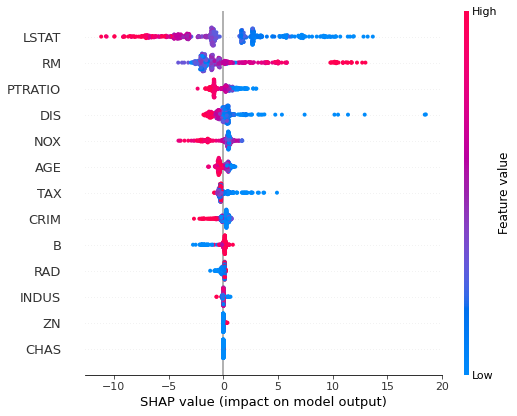

In [3]:
## SHAP plot for loc trees
explainer = shap.TreeExplainer(ngb, model_output=0)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, feature_names=load_boston()['feature_names'])

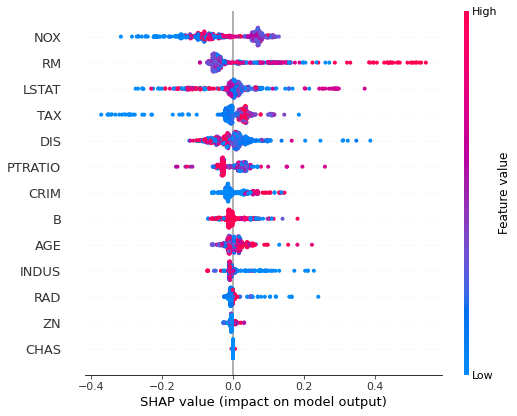

In [4]:
## SHAP plot for scale trees
explainer = shap.TreeExplainer(ngb, model_output=1)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, feature_names=load_boston()['feature_names'])